In [268]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [274]:
df = pd.read_csv('~/python/time_series_visualizer/fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [276]:
# Clean data

df = df.loc[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

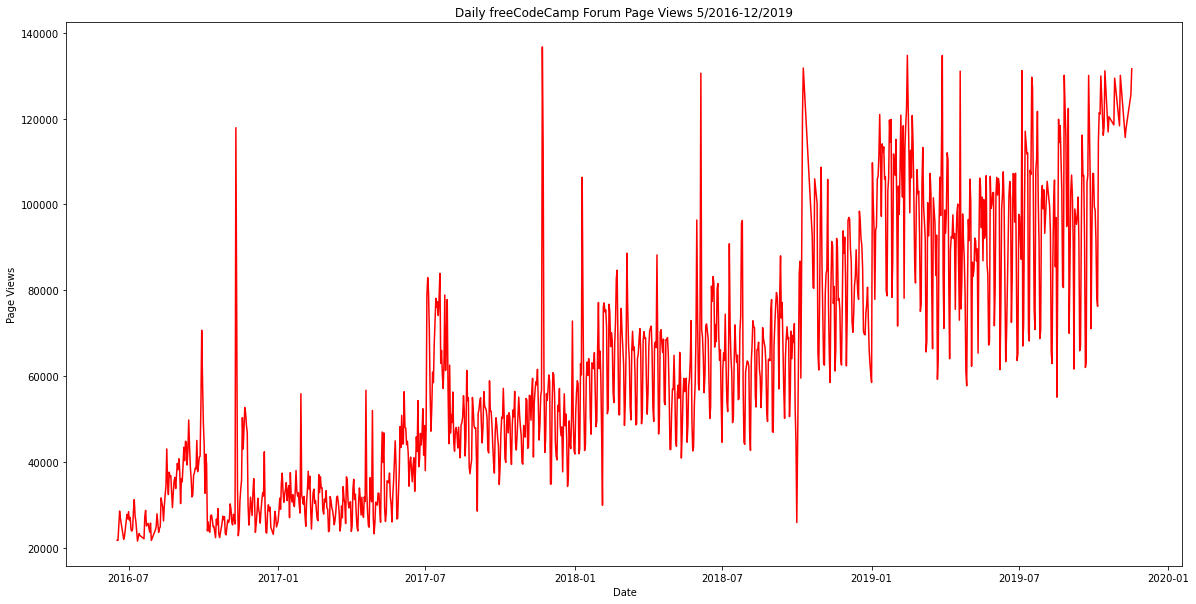

In [271]:
# Draw line plot to show daily page views from 5/2016 to 12/2019

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df['value'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [272]:
date_range = pd.date_range(start='2016-01', end='2019-12', freq='M')
new_df = pd.DataFrame(index=date_range)

In [273]:
# Insert missing monthly values with NaN

merged_df = pd.merge(df, new_df, left_index=True, right_index=True, how='outer')
merged_df

,value
2016-01-31,NaN
2016-02-29,NaN
2016-03-31,NaN
2016-04-30,NaN
2016-05-31,NaN
...,...
2019-11-09,115642.0
2019-11-10,117717.0
2019-11-16,125634.0
2019-11-17,131639.0


In [277]:
merged_df['year'] = merged_df.index.to_period('Y')
merged_df['month'] = merged_df.index.strftime('%B')
merged_df

,value,year,month
2016-01-31,NaN,2016,January
2016-02-29,NaN,2016,February
2016-03-31,NaN,2016,March
2016-04-30,NaN,2016,April
2016-05-31,NaN,2016,May
...,...,...,...
2019-11-09,115642.0,2019,November
2019-11-10,117717.0,2019,November
2019-11-16,125634.0,2019,November
2019-11-17,131639.0,2019,November


In [278]:
merged_df_bar = merged_df.groupby([merged_df['year'], merged_df['month']]).mean()
merged_df_bar.reset_index(inplace=True)

In [279]:
# Replace missing values

merged_df_bar.fillna(0, inplace=True)

Text(0, 0.5, 'Average Page Views')

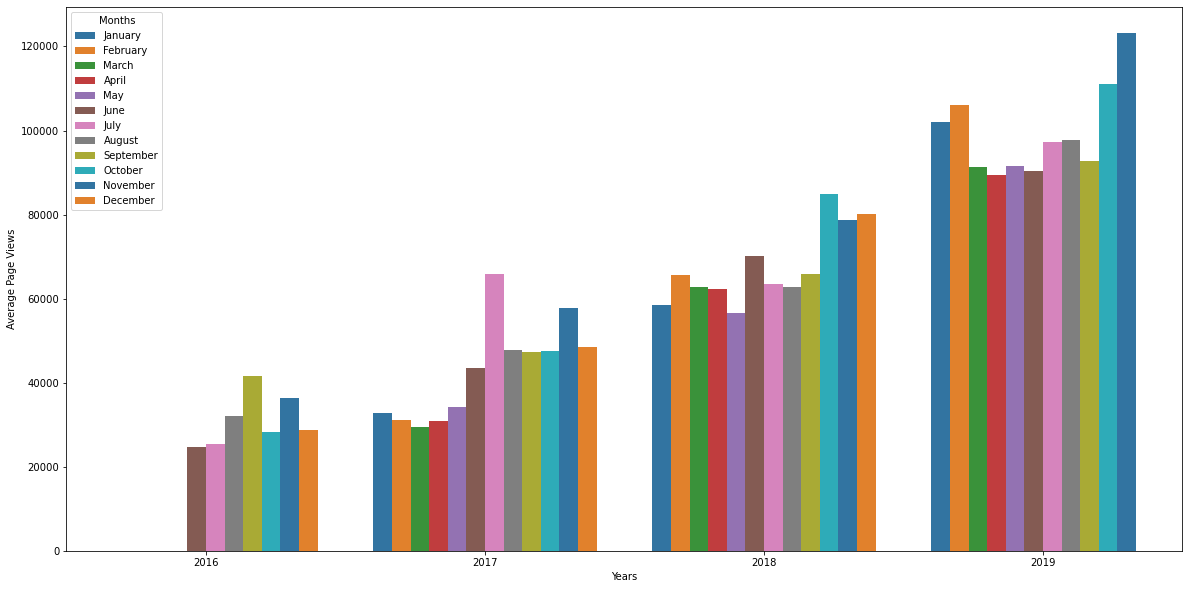

In [281]:
# Draw bar plot to show monthly page views from 2016 to 2019

merged_df_bar['month'] = merged_df_bar['month'].astype(str)

custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x='year', y='value', hue='month', data=merged_df_bar, palette='tab10', hue_order=custom_order)

plt.legend(title='Months')
plt.xlabel('Years')
plt.ylabel('Average Page Views')

In [282]:
box_df = df.copy()
box_df['year'] = box_df.index.to_period('Y')
box_df['month'] = box_df.index.strftime('%b')

box_df.reset_index(inplace=True)
box_df

,date,value,year,month
0,2016-06-17,21691,2016,Jun
1,2016-06-18,21681,2016,Jun
2,2016-06-20,28508,2016,Jun
3,2016-06-21,26805,2016,Jun
4,2016-06-25,21923,2016,Jun
...,...,...,...,...
1171,2019-11-03,130118,2019,Nov
1172,2019-11-09,115642,2019,Nov
1173,2019-11-10,117717,2019,Nov
1174,2019-11-16,125634,2019,Nov


Text(0, 0.5, 'Page Views')

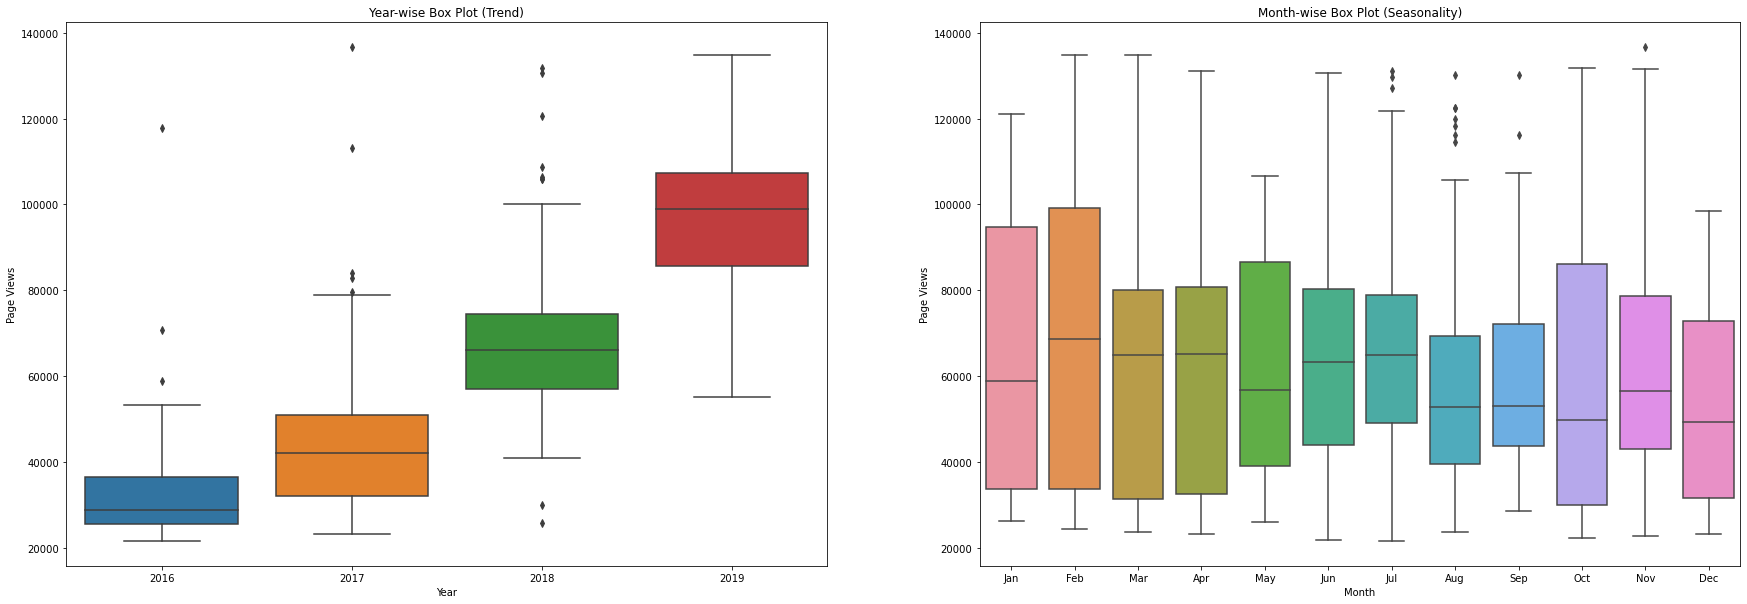

In [284]:
# Draw box plot to show trend and seasonality of Page Views

fig, axes = plt.subplots(1, 2, figsize=(30,10))

sns.boxplot(data=box_df, x="year", y="value", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(data=box_df, x="month", y="value", order=custom_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")